In [56]:
import os
# Filter out logs (additional) : 0 - all logs, 1 - INFO, 2 - WARNING, 3 - ERROR
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1'
import numpy as np
import datetime
import matplotlib.pyplot as plt

from src.data_preparation import coloc_dataset
from src.modelling import model_distri
from src.utils import tardisml_utils
from src.utils import load_Dconfig

rootdir = tardisml_utils.get_rootdir()
ifolder = 'Leo/results/distri_240221-165255/' ## with config and 4 years of training
ifolder = 'Leo/results/distri_240313-182104/' ## with config, 10 days, w/ SIA, w/o lon

file_dconfig = f'{rootdir}{ifolder}'

In [57]:
# --------------------------------------------------
#                 Load config and params
# --------------------------------------------------

config = load_Dconfig.DConfig(file_dconfig, verbose=1)

nfeat = config.nfeat
num_obs = config.num_obs
ml_name = config.ml_name
var_to_exclude = config.var_to_exclude

Config file found: /scratch/project_465000269/edelleo1/Leo/results/distri_240313-182104/Dconfig_sia_2018-10days.yaml


In [58]:
# --------------------------------------------------
#                 Load dataset
# --------------------------------------------------

# nfeat = 15  # exclude sia + lon
# num_obs = 1000

# version of TOPAZ ML-corrected to use. Is best to use TOPAZ4b ? Yes but no data after 2019 for now
fname_tp = f'{rootdir}Leo/results/lstm_230217-153340/ml/sit_gLSTM_2011_2019.nc'
model_tp = 'LSTM'

sc_file = f'{rootdir}{config.ml_dir}ScalerMM_{nfeat}feat.pkl'  # scaler
# var_to_exclude = ['sia', 'lon']  # 


d1 = datetime.datetime(2011, 12, 1)
d2 = datetime.datetime(2011, 12, 2)
# d2 = datetime.datetime(2012, 12, 1)

# full length of dataset (merge_TOPAZ)
# d1 = datetime.datetime(1992,1,1)
# d2 = datetime.datetime(2021, 12, 31) # for now: stop 1 year before so we dont have to worry about days necessary for prediction


all_days = np.array([d1 + datetime.timedelta(days=x) for x in range((d2-d1).days + 1)])
print('How does the ML manage days in summer that have no training? In term of extrapolation')

How does the ML manage days in summer that have no training? In term of extrapolation


In [59]:
from importlib import reload

In [60]:
from src.data_preparation import merge_TOPAZ

In [61]:
reload(merge_TOPAZ)

<module 'src.data_preparation.merge_TOPAZ' from '/users/edelleo1/tardis/tardis-ml/src/data_preparation/merge_TOPAZ.py'>

In [62]:
reload(coloc_dataset)

<module 'src.data_preparation.coloc_dataset' from '/users/edelleo1/tardis/tardis-ml/src/data_preparation/coloc_dataset.py'>

In [63]:
from src.data_preparation import load_data

In [64]:
reload(load_data)

<module 'src.data_preparation.load_data' from '/users/edelleo1/tardis/tardis-ml/src/data_preparation/load_data.py'>

In [65]:
dsa = coloc_dataset.DatasetApply(sc_file=sc_file, var_to_exclude=var_to_exclude, rootdir=rootdir, ml_dir=config.ml_dir)
# dsa.import_TOPAZ4(fname_tp, model_tp)
# dsa.import_TOPAZ4(filename=None, model=None)
# dsa.import_TOPAZ4(wMerge=True)

In [66]:
dsa.import_TOPAZ4(year=2000)

Loading TOPAZ...
Importing /scratch/project_465000269/edelleo1/Leo/results/lstm_231212-183758/ml/sit_gLSTM3_bk_1998_2011_01.nc
	Retrieve siconc
	Loading siconc_TOPAZ4b23_1999_2010_FreeRun.nc
	Retrieve sisnthick
	Loading sisnthick_TOPAZ4b23_1999_2010_FreeRun.nc
	Retrieve zos
	Loading zos_TOPAZ4b23_1999_2010_FreeRun.nc
	Retrieve vxsi
	Loading vxsi_TOPAZ4b23_1999_2010_FreeRun.nc
	Retrieve vysi
	Loading vysi_TOPAZ4b23_1999_2010_FreeRun.nc
Load forcings 2T_mean29d between 1999-2010
Load forcings MSL_mean29d between 1999-2010
Load forcings TP_mean29d between 1999-2010
Load forcings 10V_mean29d between 1999-2010
Load forcings 10U_mean29d between 1999-2010
Load forcings SSR_mean29d between 1999-2010
Load forcings STR_mean29d between 1999-2010
	Loading SIA 1999-2010


# ____________________________________________________

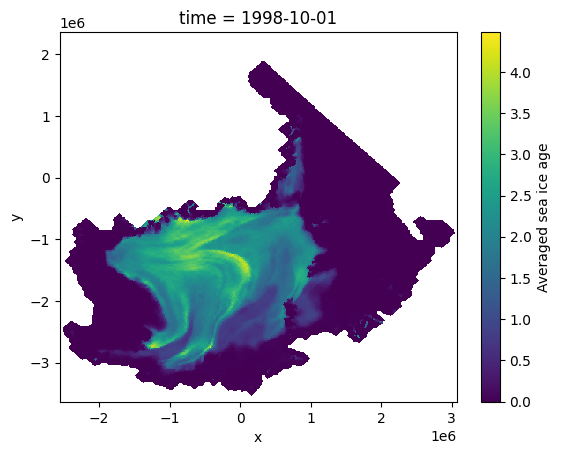

In [10]:
dsa.sia.isel(time=0).plot()

# ____________________________________________________

In [12]:
day = datetime.datetime(1992,11,26)

In [13]:
day

datetime.datetime(1992, 11, 26, 0, 0)

In [12]:
dsa.day = day

In [13]:
dsa.colocate_time()

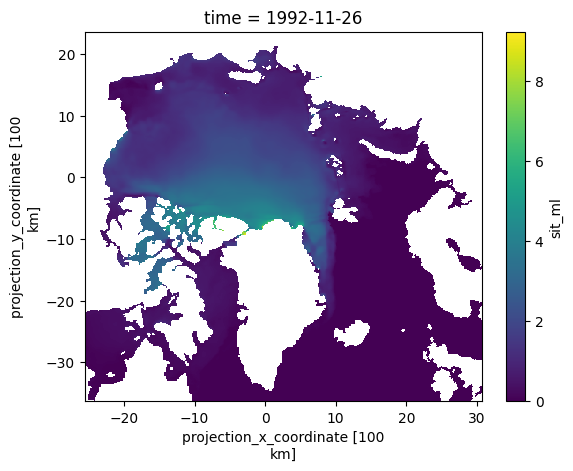

In [14]:
dsa.sit_tp.isel(time=dsa.tidx).plot()

In [16]:
tmp_sit = dsa.sit_tp.isel(time=dsa.tidx)  # easier to read
sit0 = tmp_sit.where(tmp_sit>=0).to_numpy()  # 

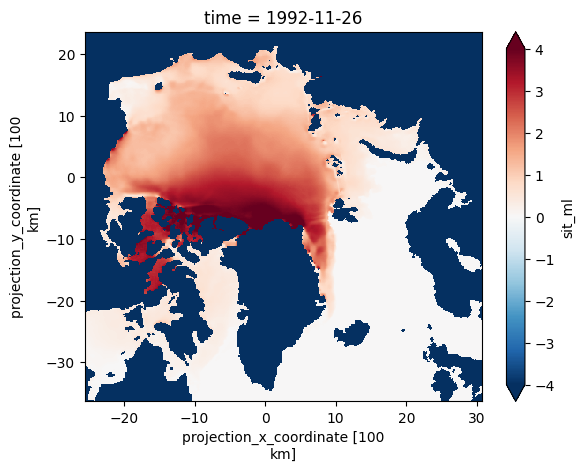

In [17]:
tmp_sit.where(tmp_sit>=0,  -99).plot(vmax=4)

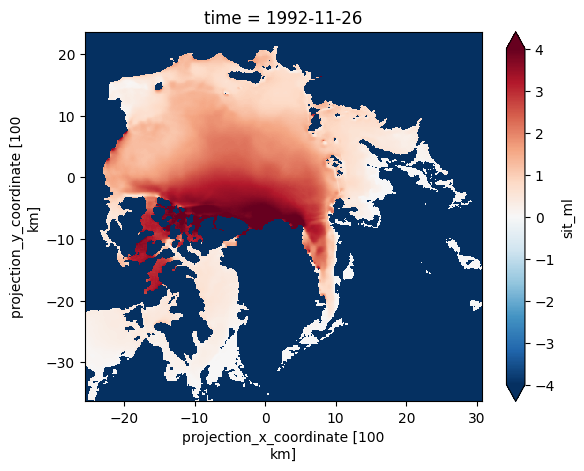

In [18]:
tmp_sit.where(tmp_sit>0,  -99).plot(vmax=4)

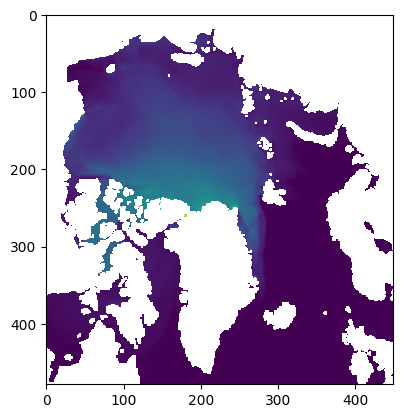

In [19]:
plt.imshow(sit0[::-1])

In [24]:
sit0 = tmp_sit.where(tmp_sit>0).to_numpy()  # 

In [25]:
ind_valid = np.where(~np.isnan(sit0))

In [26]:
test_map_2d = np.zeros((479, 450))
for n, (y,x) in enumerate(zip(ind_valid[0], ind_valid[1])):
    test_map_2d[y, x] = 5

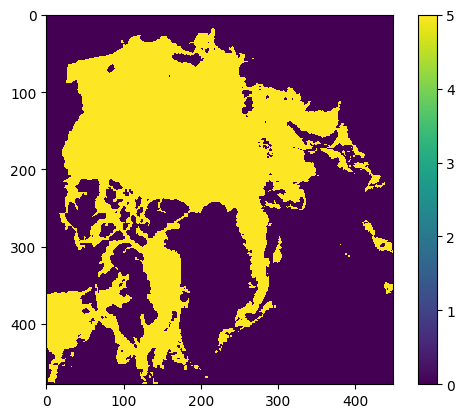

In [27]:
plt.imshow(test_map_2d[::-1], interpolation='None')
plt.colorbar()

In [29]:
dsa.features

['SIT',
 'month',
 'lat',
 'lon',
 'siconc',
 'sisnthick',
 'zos',
 'vxsi',
 'vysi',
 '2T',
 'MSL',
 'TP',
 '10V',
 '10U',
 'SSR',
 'STR',
 'sia']

# ____________________________________________________

In [21]:
type(dsa.chrono)

pandas.core.frame.DataFrame

In [67]:
day = datetime.datetime(2000,11,26)

In [13]:
dsa.tidx

AttributeError: 'DatasetApply' object has no attribute 'tidx'

In [14]:
dsa.dsCo['siconc'].time

<xarray.DataArray 'time' (time: 4565)>
array(['1998-10-01T00:00:00.000000000', '1998-10-02T00:00:00.000000000',
       '1998-10-03T00:00:00.000000000', ..., '2011-03-29T00:00:00.000000000',
       '2011-03-30T00:00:00.000000000', '2011-03-31T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 1998-10-01 1998-10-02 ... 2011-03-31
Attributes:
    long_name:  forecast time

In [18]:
dsa.chrono

,date
0,1998-10-01
1,1998-10-02
2,1998-10-03
3,1998-10-04
4,1998-10-05
...,...
4560,2011-03-27
4561,2011-03-28
4562,2011-03-29
4563,2011-03-30


In [68]:
dsa.var_to_exclude# = ['lon']

['lon']

In [69]:
dsa.make_X(day)

Generating inputs from netcdf files:  2000-11-26 00:00:00
> /users/edelleo1/tardis/tardis-ml/src/data_preparation/coloc_dataset.py(758)make_X()
    756         # indexes to keep to apply algo only where:
    757         # not nan and SIT > 0
--> 758         tmp_sit = self.sit_tp.isel(time=self.tidx)  # easier to read
    759         sit0 = tmp_sit.where(tmp_sit >0).to_numpy()  # SIT > 0
    760         ind_valid = np.where(~np.isnan(sit0))

ipdb> c
Variable: lon excluded
Scaling data...


In [70]:
dsa.X.shape

(75920, 16)

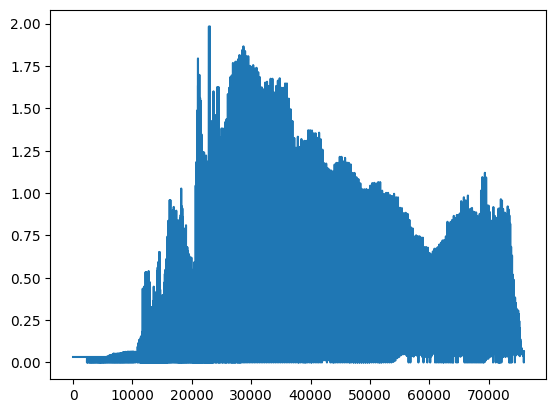

In [71]:
plt.plot(dsa.X[:,-1])

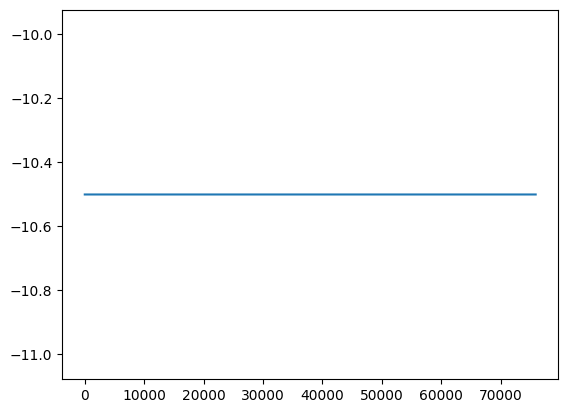

In [72]:
plt.plot(dsa.X[:,1])

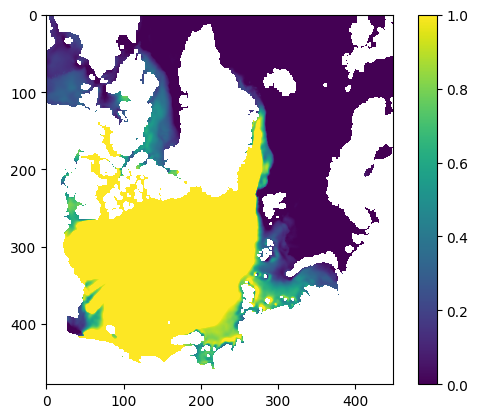

In [73]:
plt.imshow(dsa.sit_tp.isel(time=dsa.tidx).to_numpy(), vmax=1)
plt.colorbar()

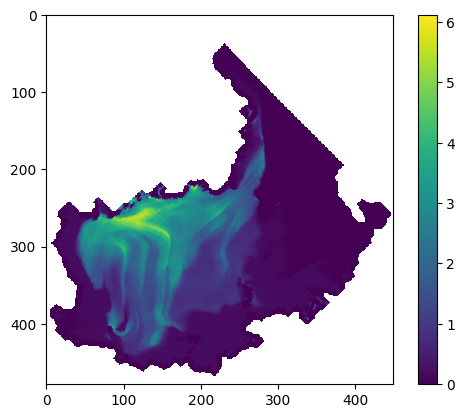

In [74]:
plt.imshow(dsa.sia.isel(time=dsa.tidx, y=slice(None,None,-1)).to_numpy())
plt.colorbar()

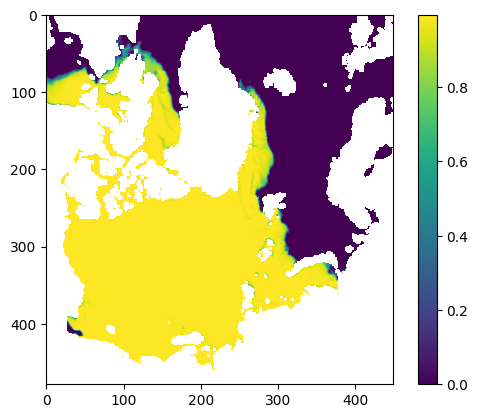

In [75]:
plt.imshow(dsa.dsCo['siconc'].isel(time=dsa.tidx).to_numpy())
plt.colorbar()